In [1]:
# Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Download ticker prices for the last 2 years
ticker = ["AAPL", "NVDA", "META", "MSFT"]

data = yf.download(ticker, period="2y", auto_adjust=True)
data.tail

[*********************100%***********************]  4 of 4 completed


<bound method NDFrame.tail of Price            Close                                            High  \
Ticker            AAPL        META        MSFT        NVDA        AAPL   
Date                                                                     
2023-11-22  189.520157  339.397705  372.299133   48.687302  191.124996   
2023-11-24  188.192719  336.157684  371.885223   47.747860  189.114011   
2023-11-27  188.014420  332.649323  373.047913   48.213577  188.886192   
2023-11-28  188.618683  336.912964  377.077820   47.792835  189.292329   
2023-11-29  187.598358  330.164642  373.284393   48.111649  190.292913   
...                ...         ...         ...         ...         ...   
2025-11-17  267.459991  602.010010  506.541931  186.600006  270.489990   
2025-11-18  267.440002  597.690002  492.867554  181.360001  270.709991   
2025-11-19  268.559998  590.320007  486.209991  186.520004  272.209991   
2025-11-20  266.250000  589.150024  478.429993  180.639999  275.429993   
2025-11-

In [3]:
# Filter closing prices for all tickers

prices = data["Close"]
prices 

Ticker,AAPL,META,MSFT,NVDA
Date,,,,
2023-11-22,189.520157,339.397705,372.299133,48.687302
2023-11-24,188.192719,336.157684,371.885223,47.747860
2023-11-27,188.014420,332.649323,373.047913,48.213577
2023-11-28,188.618683,336.912964,377.077820,47.792835
2023-11-29,187.598358,330.164642,373.284393,48.111649
...,...,...,...,...
2025-11-17,267.459991,602.010010,506.541931,186.600006
2025-11-18,267.440002,597.690002,492.867554,181.360001
2025-11-19,268.559998,590.320007,486.209991,186.520004


In [4]:
# Computing returns of each ticker 

rets = prices.pct_change().dropna()
rets

Ticker,AAPL,META,MSFT,NVDA
Date,,,,
2023-11-24,-0.007004,-0.009546,-0.001112,-0.019295
2023-11-27,-0.000947,-0.010437,0.003126,0.009754
2023-11-28,0.003214,0.012817,0.010803,-0.008727
2023-11-29,-0.005409,-0.020030,-0.010060,0.006671
2023-11-30,0.003063,-0.015202,0.000158,-0.028459
...,...,...,...,...
2025-11-17,-0.018171,-0.012224,-0.005273,-0.018773
2025-11-18,-0.000075,-0.007176,-0.026996,-0.028081
2025-11-19,0.004188,-0.012331,-0.013508,0.028452


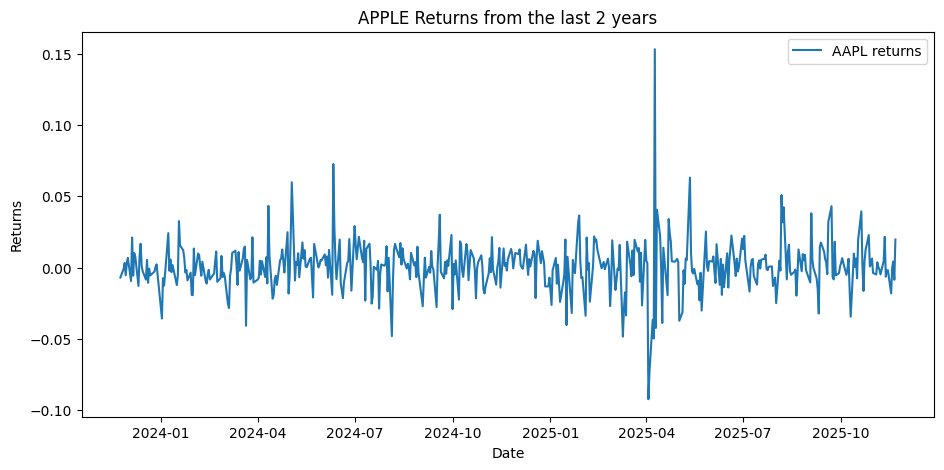

In [5]:
# Plot returns for each ticker

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["AAPL"], label="AAPL returns")

plt.title("APPLE Returns from the last 2 years")
plt.xlabel("Date"); plt.ylabel("Returns")
plt.legend()
plt.show()

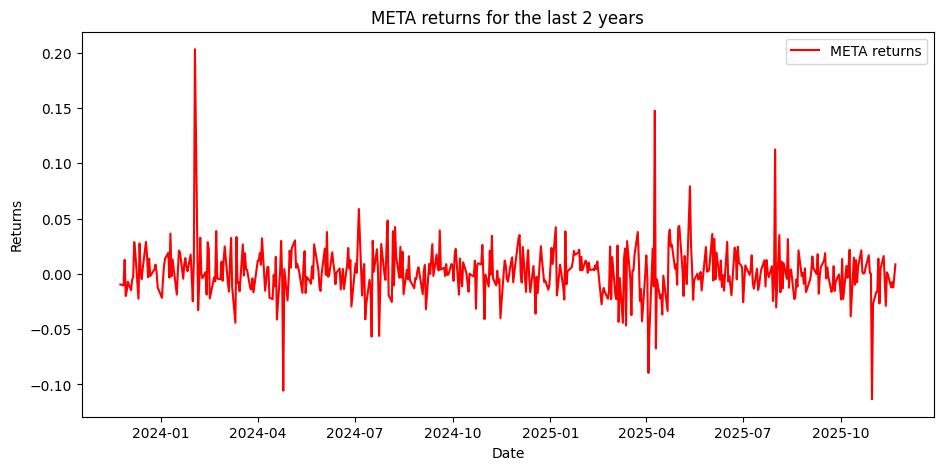

In [6]:
# Plot returns for META

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["META"], label="META returns", color="red")

plt.xlabel("Date"); plt.ylabel("Returns")
plt.title("META returns for the last 2 years")
plt.legend()
plt.show()

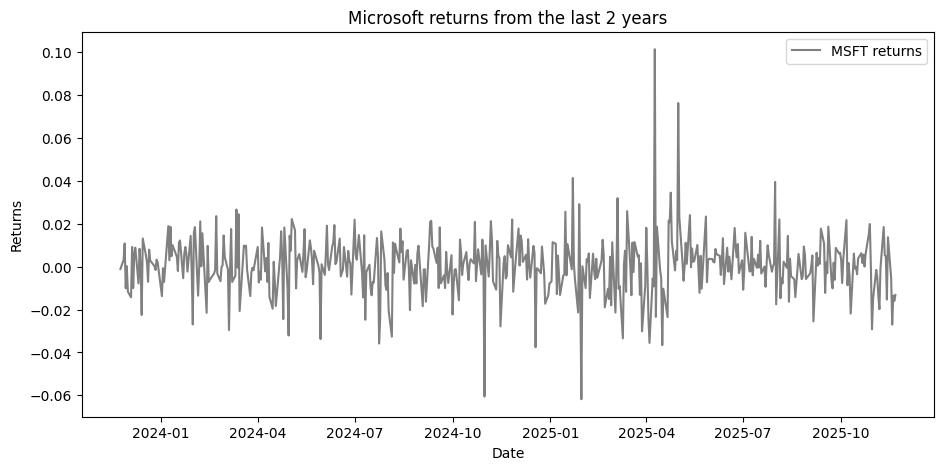

In [7]:
#  Plot returns for MSFT

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["MSFT"], label="MSFT returns", color="grey")

plt.xlabel("Date"); plt.ylabel("Returns")
plt.title("Microsoft returns from the last 2 years")
plt.legend()
plt.show()

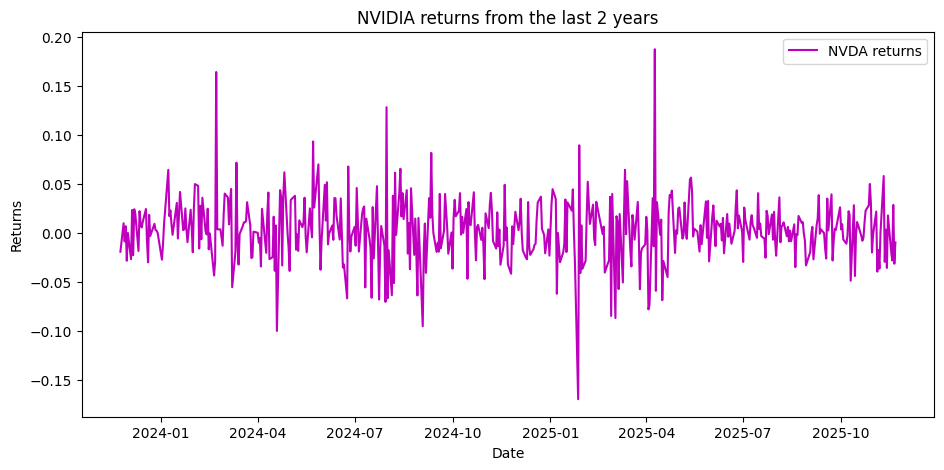

In [8]:
#  Plot returns for NVIDIA

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["NVDA"], label="NVDA returns", color="m")

plt.xlabel("Date"); plt.ylabel("Returns")
plt.title("NVIDIA returns from the last 2 years")
plt.legend()
plt.show()

In [9]:
# Computing correlations for each ticker

correlations_tickers = prices.corr()

In [10]:
correlations_tickers

Ticker,AAPL,META,MSFT,NVDA
Ticker,,,,
AAPL,1.000000,0.606562,0.521759,0.758309
META,0.606562,1.000000,0.782047,0.886232
MSFT,0.521759,0.782047,1.000000,0.866473
NVDA,0.758309,0.886232,0.866473,1.000000


In [1]:
# Computing Sharpe ratio

# First its necessary to install fredapi
!pip install fredapi

In [11]:
# Using the API from FRED

from fredapi import Fred

# Connect to FRED
fred = Fred(api_key=open("fred_key.txt").read().strip())

# Download 3-Month T-Bill Yield (DTB3) for 2023 - 2025
rf = fred.get_series("DTB3", observation_start="2023-11-14", observation_end="2025-11-11")

# Convert to DataFrame
rf = rf.to_frame(name="t_bill_rate")
rf.index = pd.to_datetime(rf.index)

# Convert to decimal
rf["t_bill_rate"] = rf["t_bill_rate"] / 100

# Compute annual risk-free rate (mean of entire period)
r_f_annual = rf["t_bill_rate"].mean()
print("Annual risk-free rate (2023-2025):", r_f_annual)

# Convert to daily risk-free rate
r_f_daily = (1 + r_f_annual)**(1/252) - 1
print("Daily risk-free rate:", r_f_daily)

Annual risk-free rate (2023-2025): 0.04624748490945674
Daily risk-free rate: 0.00017942061343312332


In [12]:
# Computing Sharpe ratio for all tickers

for i in rets.columns:
    # compute the mean daily returns for ticker i
    m_ret = rets[i].mean()
    std_ret = rets[i].std()
    s = (m_ret - r_f_daily) / std_ret
    print(f" Daily Sharpe ratio for {i}: {s}")

 Daily Sharpe ratio for AAPL: 0.03920727526213028
 Daily Sharpe ratio for META: 0.05156112005239353
 Daily Sharpe ratio for MSFT: 0.028109764931900972
 Daily Sharpe ratio for NVDA: 0.09129162104438543


In [13]:
# Converting daily Sharpe ratios to annual Sharpe ratios

for i in rets.columns:
    # compute the mean daily returns for ticker i
    m_ret = rets[i].mean()
    std_ret = rets[i].std()
    s = ((m_ret - r_f_daily) / std_ret) * (252**(1/2))
    print(f" Annual Sharpe ratio for {i}: {s}")

 Annual Sharpe ratio for AAPL: 0.6223961995683089
 Annual Sharpe ratio for META: 0.8185074058714736
 Annual Sharpe ratio for MSFT: 0.44622868453376674
 Annual Sharpe ratio for NVDA: 1.4492095564043672


## Interpretation (industry level)
Sharpe < 0.5 -> weak

0.5 - 1.0 -> good

1.0 - 2.0 -> very good

Greater than 2.0 -> exceptional (rare in real markets)

# Choosen stocks:

NVDA -> excellent risk-adjusted returns

META -> good 

AAPL/MSFT -> okay but not amazing

In [14]:
# Summary DataFrame

results_sharpe = [] # empty list

for i in rets.columns:
    m_ret = rets[i].mean()
    std_ret = rets[i].std()
    s_daily = (m_ret - r_f_daily) / std_ret
    s_annual = s_daily * (252 ** 0.5)

    results_sharpe.append({
    "Ticker": i,
    "Mean_Daily_Return": m_ret,
    "Daily_std": std_ret,
    "Sharpe_Daily": s_daily,
    "Sharpe_Annual": s_annual
    })

summary_df = pd.DataFrame(results_sharpe)

summary_df

,Ticker,Mean_Daily_Return,Daily_std,Sharpe_Daily,Sharpe_Annual
0,AAPL,0.000872,0.017657,0.039207,0.622396
1,META,0.001388,0.023430,0.051561,0.818507
2,MSFT,0.000570,0.013903,0.028110,0.446229
3,NVDA,0.003115,0.032157,0.091292,1.449210


In [15]:
# Save results to CSV
#summary_df.to_csv("sharpe_summary.csv", index=False)

In [16]:
# Cumulative returns - TBD!

In [17]:
# Computing returns in percentages

per_ret = []

for i in range(len(rets)):
    #print(rets.iloc[i, 0], rets.iloc[i, 1])
    row_dict = {}

    for ticker in rets.columns:
        row_dict[f"{ticker}_rets (%)"] = rets.iloc[i][ticker] * 100
            
    per_ret.append(row_dict)

# Converts cumulative_ret into a DataFrame
p_ret = pd.DataFrame(per_ret, index=rets.index)

In [18]:
p_ret

,AAPL_rets (%),META_rets (%),MSFT_rets (%),NVDA_rets (%)
Date,,,,
2023-11-24,-0.700421,-0.954638,-0.111177,-1.929541
2023-11-27,-0.094743,-1.043666,0.312647,0.975368
2023-11-28,0.321392,1.281723,1.080265,-0.872663
2023-11-29,-0.540946,-2.002987,-1.006006,0.667073
2023-11-30,0.306277,-1.520164,0.015836,-2.845876
...,...,...,...,...
2025-11-17,-1.817118,-1.222396,-0.527263,-1.877264
2025-11-18,-0.007474,-0.717597,-2.699555,-2.808149
2025-11-19,0.418784,-1.233080,-1.350781,2.845172


In [19]:
# Joining Returns DF and Cumulative returns DF 

#cr_close = pd.concat([c_ret.dropna(), prices], axis=1)

In [39]:
# Computing Cumulative returns

# Cumulative returns formula => W = W(t-1) * (1 + r(t))
# Using prices DF and rets DF

# 1) Initial investment
initial_inv = prices.iloc[0]

# 2) cumulative value patch
cum_value = (1 + rets).cumprod() * initial_inv

# 3) Final cumulative value
final_value = cum_value.iloc[-1]

# 4) Cumulative return (%)
cum_return_pct = (final_value / initial_inv - 1) * 100

print("Final cumulative value:\n", final_value)
print("\nCumulative return (%):\n", cum_return_pct)

Final cumulative value:
 Ticker
AAPL    271.489990
META    594.250000
MSFT    472.119995
NVDA    178.880005
Name: 2025-11-21 00:00:00, dtype: float64

Cumulative return (%):
 Ticker
AAPL     43.251248
META     75.089575
MSFT     26.812005
NVDA    267.405871
dtype: float64


In [45]:
# Cleaner summary table that contains the initial value/initial investment, final value and the cumulative return percentage

summary = pd.DataFrame({
    "Initial Value": initial_inv,
    "Final Value": final_value,
    "Cumulative Return (%)": cum_return_pct
})
print(summary)


        Initial Value  Final Value  Cumulative Return (%)
Ticker                                                   
AAPL       189.520157   271.489990              43.251248
META       339.397705   594.250000              75.089575
MSFT       372.299133   472.119995              26.812005
NVDA        48.687302   178.880005             267.405871
